In [ ]:
import pandas as pd

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/MTP_New_dataset/ready_data.csv')

<ipython-input-3-f262c610a210>:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/drive/MyDrive/MTP_New_dataset/ready_data.csv')


In [ ]:
df2

,Fiscal Year,Purchase Order,Purchase Order Line,Purchasing Department,Post Date - Original,Post Date - Current,Commodity Code,Commodity Title,Vendor Name,Vendor State,Encumbered Quantity,Encumbered Amount,Fiscal Year Adjusted,Fiscal Year Start,contract_term,Vendor_Name_Label,late_payment
0,2019,0000266823,1.0,96,2019-01-09,2019-06-14,92000,DATA PROCESSING COMPUTER PROGRAMMING AND SOFTW...,PTV AMERICA INC,OR,-0.003709,-0.001206,2018,2018-07-01,192,1285,1
1,2019,0000250917,1.0,45,2018-11-20,2019-03-01,99867,Medical and Dental Equipment and Supplies,DRAEGER INC,NJ,-0.003585,-0.001204,2018,2018-07-01,142,200,1
2,2018,0000099667,3.0,45,2017-09-11,2018-06-08,46500,HOSPITAL AND SURGICAL EQUIPMENT INSTRUMENTS AN...,DEPUY SYNTHES SPINE,PA,-0.003684,-0.001216,2017,2017-07-01,72,82,1
3,2020,0000327259,1.0,111,2019-07-02,2019-08-05,65997,Pipe Fittings Misc. (Not Otherwise Classified),M S C INDUSTRIAL SUPPLY COMPANY INC,MO,-0.001250,-0.001216,2019,2019-07-01,1,10,1
4,2020,0000327259,3.0,111,2019-07-02,2019-08-05,65997,Pipe Fittings Misc. (Not Otherwise Classified),M S C INDUSTRIAL SUPPLY COMPANY INC,MO,-0.001747,-0.001212,2019,2019-07-01,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410425,2018,0000181714,27.0,45,2018-05-09,2018-08-08,46523,Diagnostic Equipment Minor: Headlights Penligh...,CARDINALHEALTH MEDICAL PRODUCTS & SVCS,CA,-0.003113,-0.001217,2017,2017-07-01,312,9,1
410426,2012,DPBR12001425,3.0,51,2011-12-22,2011-12-22,967095,"PLUMBING & STEAM GENERATION SYS, EQPT, MATLS &...",SIGILLO SUPPLY INC,CA,-0.003585,-0.001217,2011,2011-07-01,174,190,0
410427,2013,DPPT13000572,1.0,46,2012-09-17,2012-09-17,955840,"HYBRID TRANSIT VEHICLE EQPT, PARTS, MATLS & SUPPL",CUMMINS-WEST INC,CA,-0.003684,-0.001217,2012,2012-07-01,78,313,0
410428,2019,257428,8.0,45,2018-12-09,2019-03-01,17595,Water Purification Apparatus and Treatments (F...,MEDLINE INDUSTRIES INC,CA,-0.003684,-0.001217,2018,2018-07-01,161,1,1


In [ ]:
df2.columns

Index(['Fiscal Year', 'Purchase Order', 'Purchase Order Line',
       'Purchasing Department', 'Post Date - Original', 'Post Date - Current',
       'Commodity Code', 'Commodity Title', 'Vendor Name', 'Vendor State',
       'Encumbered Quantity', 'Encumbered Amount', 'Fiscal Year Adjusted',
       'Fiscal Year Start', 'contract_term', 'Vendor_Name_Label',
       'late_payment'],
      dtype='object')

Model Accuracy: 89.76%


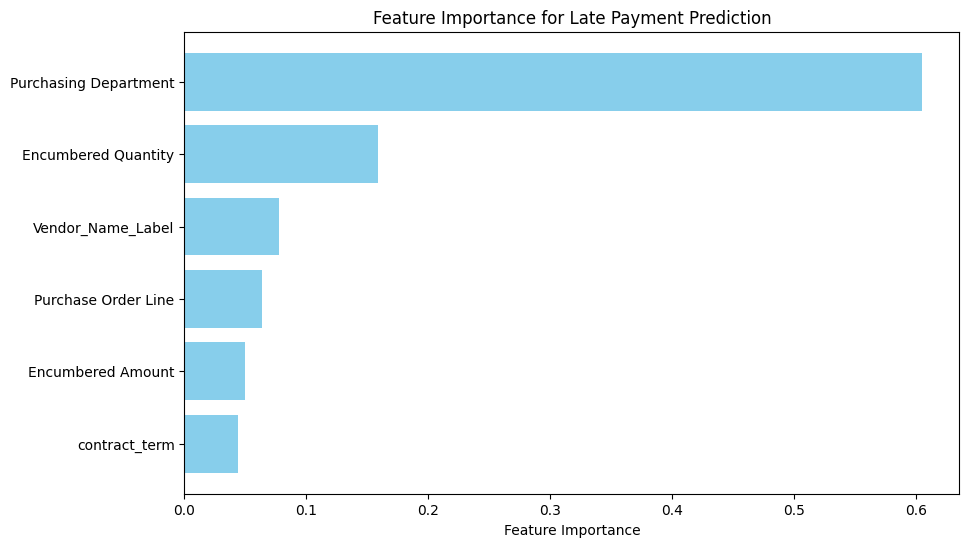

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define the feature set and the target variable
features = ['Purchase Order Line', 'Purchasing Department',
            'Encumbered Quantity', 'Encumbered Amount',
            'contract_term', 'Vendor_Name_Label']

X = df2[features]  # Feature matrix
y = df2['late_payment']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train an XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Step 5: Extract feature importance
importance = model.feature_importances_

# Step 6: Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 7: Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Late Payment Prediction')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


In [ ]:
# Check the structure and basic info of the data
df2.info()

# Get summary statistics for numerical columns
df2.describe()

# Check for missing values
df2.isnull().sum()

# Check the unique values in each column
df2.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410430 entries, 0 to 410429
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Fiscal Year            410430 non-null  int64  
 1   Purchase Order         410430 non-null  object 
 2   Purchase Order Line    410425 non-null  float64
 3   Purchasing Department  410430 non-null  int64  
 4   Post Date - Original   410430 non-null  object 
 5   Post Date - Current    410380 non-null  object 
 6   Commodity Code         410430 non-null  object 
 7   Commodity Title        410407 non-null  object 
 8   Vendor Name            410430 non-null  object 
 9   Vendor State           409933 non-null  object 
 10  Encumbered Quantity    410430 non-null  float64
 11  Encumbered Amount      410430 non-null  float64
 12  Fiscal Year Adjusted   410430 non-null  int64  
 13  Fiscal Year Start      410430 non-null  object 
 14  contract_term          410430 non-nu

,0
Fiscal Year,20
Purchase Order,184305
Purchase Order Line,179
Purchasing Department,126
Post Date - Original,4005
Post Date - Current,3644
Commodity Code,8656
Commodity Title,5648
Vendor Name,7555
Vendor State,69


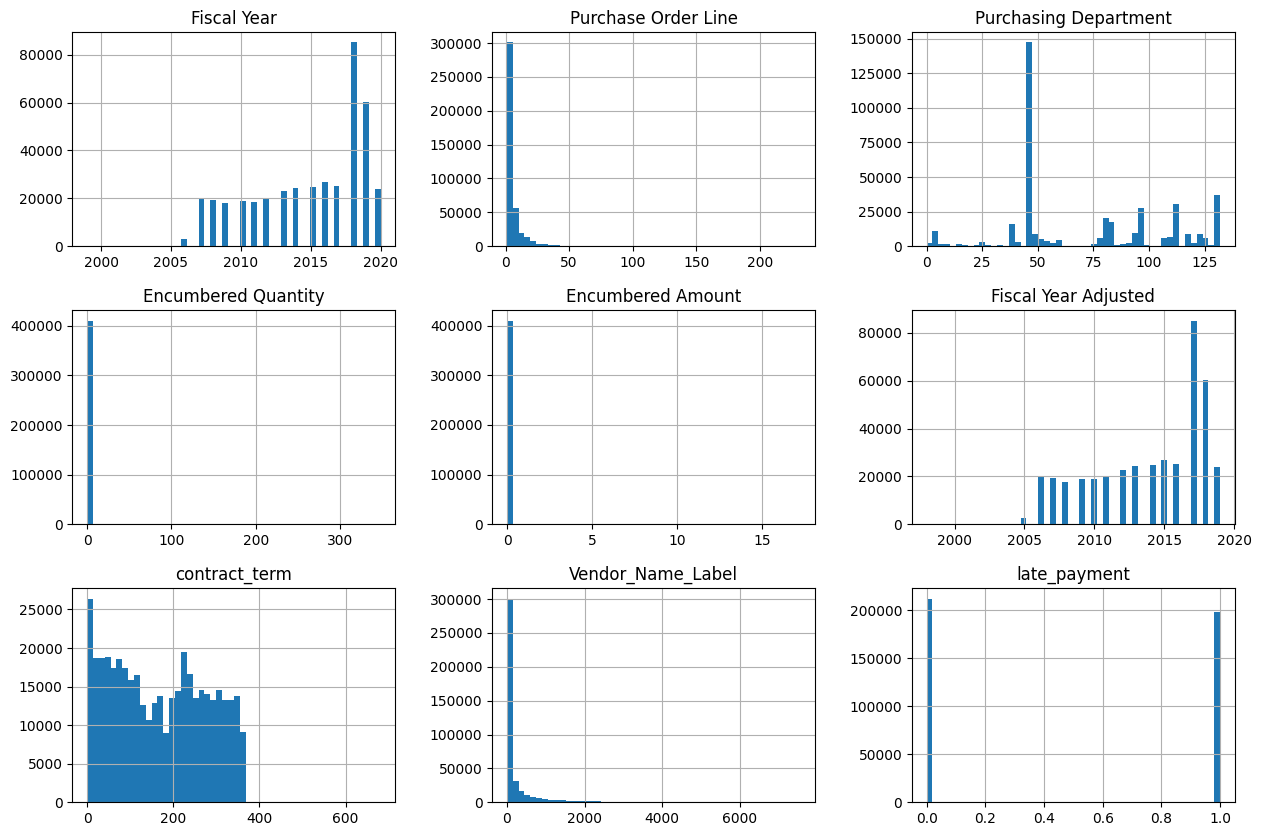

In [ ]:
# Distribution of numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numeric columns
df2.hist(figsize=(15, 10), bins=50)
plt.show()

# Distribution of Encumbered Quantity and Encumbered Amount
#sns.histplot(df2['Encumbered Quantity'], kde=True)
#sns.histplot(df2['Encumbered Amount'], kde=True)


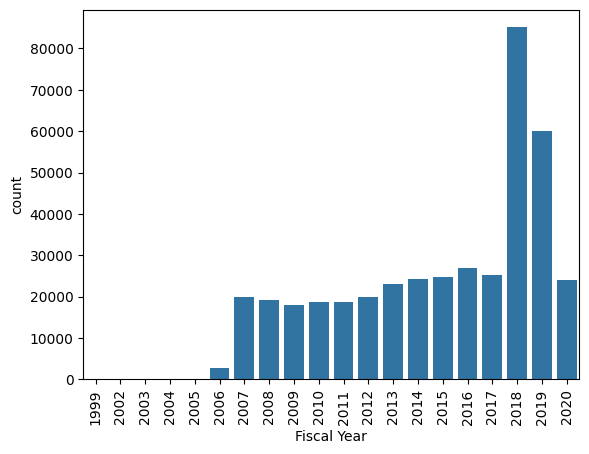

<ipython-input-7-ccfcf67ad48f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vendor State', data=df2, palette='coolwarm')  # Use a color palette for a better look


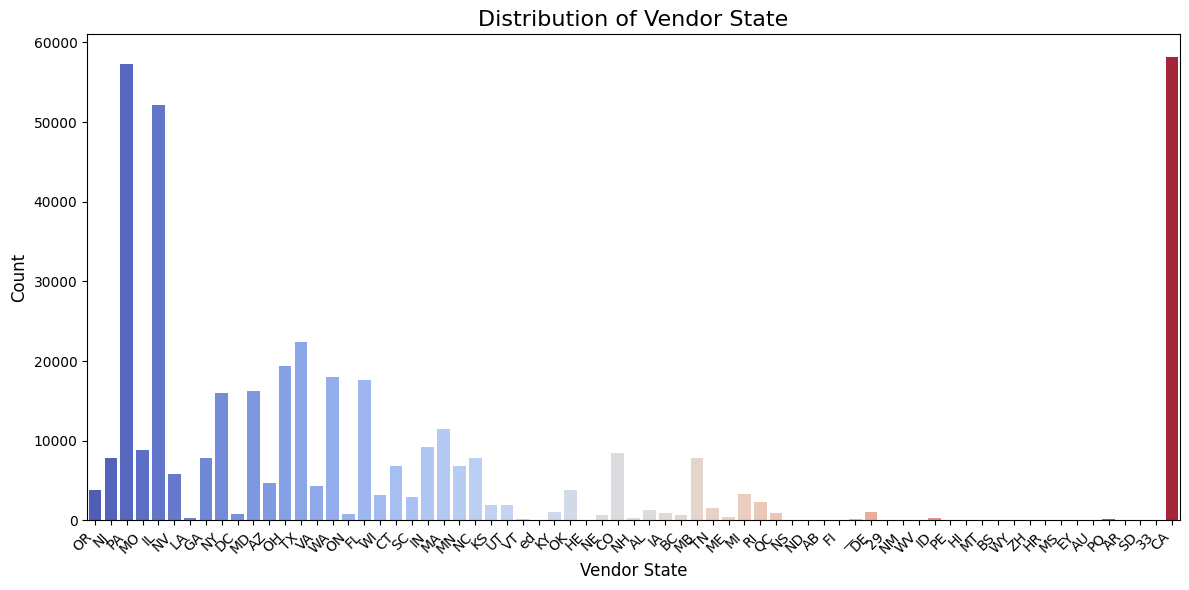

In [ ]:

# Distribution of categorical columns
sns.countplot(x='Fiscal Year', data=df2)
plt.xticks(rotation=90)
plt.show()

# Set a wider figure size and customize the plot
plt.figure(figsize=(12, 6))  # Make the figure wider
sns.countplot(x='Vendor State', data=df2, palette='coolwarm')  # Use a color palette for a better look

# Customize the x-axis labels and plot title
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.title('Distribution of Vendor State', fontsize=16)  # Add a title
plt.xlabel('Vendor State', fontsize=12)  # Label for x-axis
plt.ylabel('Count', fontsize=12)  # Label for y-axis

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Vendor State
CA    58115
PA    57249
IL    52111
TX    22419
OH    19429
WA    17947
FL    17576
MD    16290
NY    16048
MA    11472
Name: count, dtype: int64


<ipython-input-8-683d7c5dc6f4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='coolwarm')  # Create a barplot for top 10 states


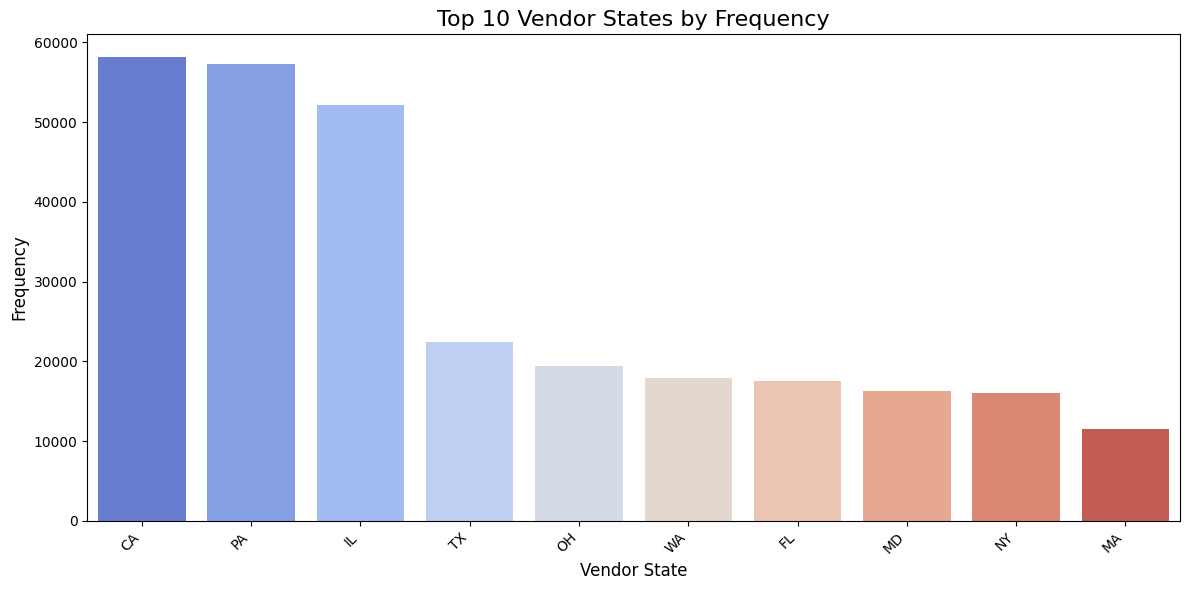

In [ ]:
# Get the frequency of the top 10 states
top_10_states = df2['Vendor State'].value_counts().head(10)

# Display the frequencies
print(top_10_states)


# Plot the top 10 states
plt.figure(figsize=(12, 6))  # Set a wider figure size
sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='coolwarm')  # Create a barplot for top 10 states

# Customize the x-axis labels and plot title
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.title('Top 10 Vendor States by Frequency', fontsize=16)  # Add a title
plt.xlabel('Vendor State', fontsize=12)  # Label for x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for y-axis

# Display the plot
plt.tight_layout()  # Adjust layout
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Step 3: Prepare the features and target variable
X = df2[['Purchasing Department', 'Vendor_Name_Label', 'Encumbered Quantity', 'Encumbered Amount', 'contract_term']]
y = df2['late_payment']

# Convert categorical feature 'Purchasing Department' to numerical format
X = pd.get_dummies(X, columns=['Purchasing Department'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:11:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8862412591672149
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89     42626
           1       0.92      0.84      0.88     39460

    accuracy                           0.89     82086
   macro avg       0.89      0.88      0.89     82086
weighted avg       0.89      0.89      0.89     82086



In [ ]:
df2 = df2.drop(columns=['Vendor Name'])

In [ ]:
#df2.to_csv('/content/drive/MyDrive/MTP_New_dataset/ready_data_final.csv', index=False)

Purchasing Department
45     95272
46     47151
111    29333
131    27878
96     27363
39     15249
81     13379
5      10059
132     8969
83      8260
Name: count, dtype: int64


<ipython-input-12-789c1ef7fe24>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_departments.index, y=top_10_departments.values, palette='coolwarm')  # Create a barplot for top 10 departments


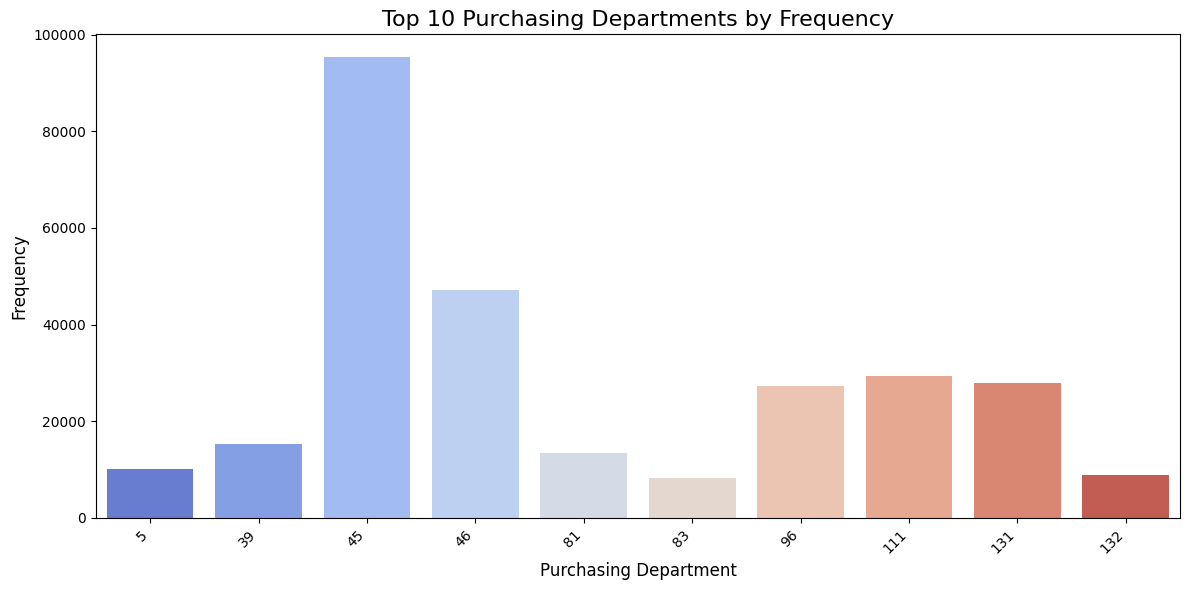

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the frequency of the top 10 purchasing departments
top_10_departments = df2['Purchasing Department'].value_counts().head(10)

# Display the frequencies
print(top_10_departments)

# Plot the top 10 purchasing departments
plt.figure(figsize=(12, 6))  # Set a wider figure size
sns.barplot(x=top_10_departments.index, y=top_10_departments.values, palette='coolwarm')  # Create a barplot for top 10 departments

# Customize the x-axis labels and plot title
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.title('Top 10 Purchasing Departments by Frequency', fontsize=16)  # Add a title
plt.xlabel('Purchasing Department', fontsize=12)  # Label for x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for y-axis

# Display the plot
plt.tight_layout()  # Adjust layout
plt.show()


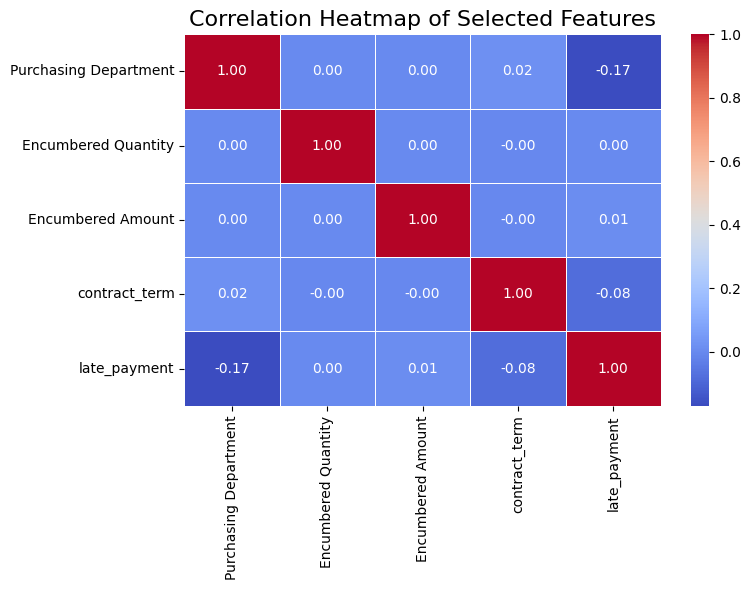

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only the specified features for the heatmap
features = ['Purchasing Department', 'Encumbered Quantity', 'Encumbered Amount', 'contract_term', 'late_payment']

# Subset the dataframe with the selected features
df_subset = df2[features]


# Calculate the correlation matrix
corr_matrix = df_subset.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize the plot with title and layout
plt.title('Correlation Heatmap of Selected Features', fontsize=16)
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


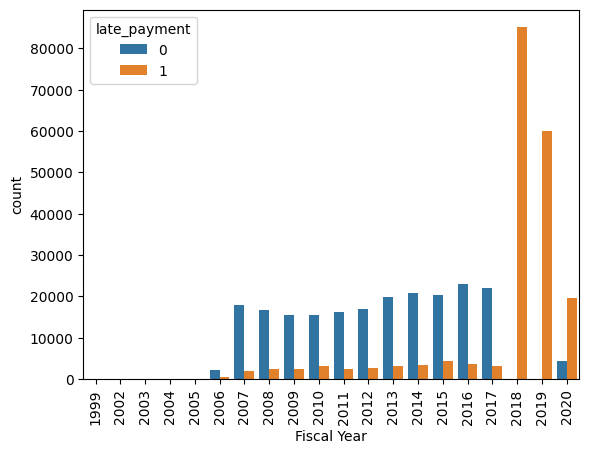

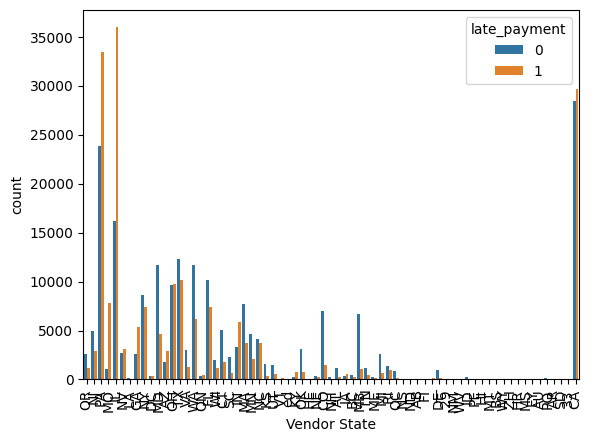

In [ ]:
# Count of late payments
df2['late_payment'].value_counts()

# Late payments by fiscal year
sns.countplot(x='Fiscal Year', hue='late_payment', data=df2)
plt.xticks(rotation=90)
plt.show()

# Late payments by Vendor State
sns.countplot(x='Vendor State', hue='late_payment', data=df2)
plt.xticks(rotation=90)
plt.show()


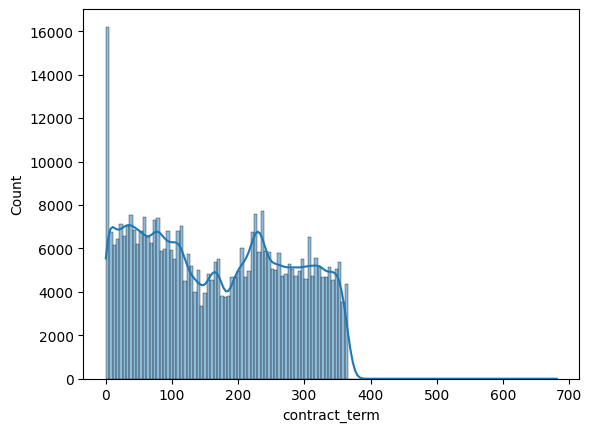

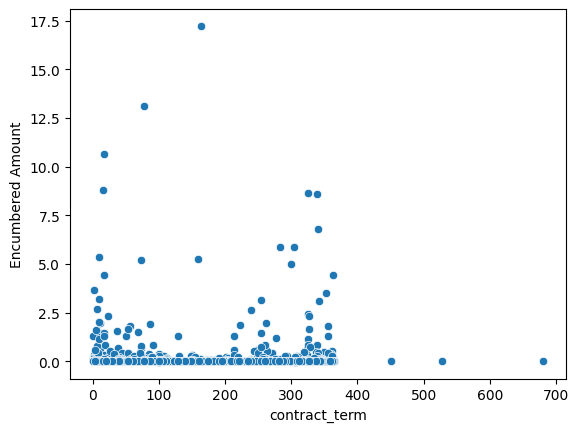

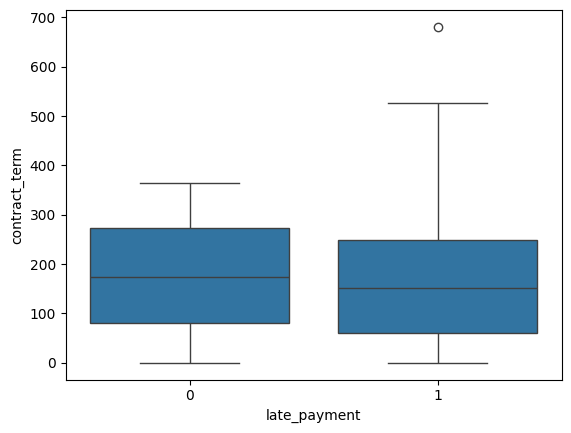

In [ ]:
# Distribution of contract_term
sns.histplot(df2['contract_term'], kde=True)
plt.show()

# Contract term vs. Encumbered Amount
sns.scatterplot(x='contract_term', y='Encumbered Amount', data=df2)
plt.show()

# Contract term by late payment
sns.boxplot(x='late_payment', y='contract_term', data=df2)
plt.show()


In [ ]:
df2.columns

Index(['Fiscal Year', 'Purchase Order', 'Purchase Order Line',
       'Purchasing Department', 'Post Date - Original', 'Post Date - Current',
       'Commodity Code', 'Commodity Title', 'Vendor State',
       'Encumbered Quantity', 'Encumbered Amount', 'Fiscal Year Adjusted',
       'Fiscal Year Start', 'contract_term', 'Vendor_Name_Label',
       'late_payment'],
      dtype='object')

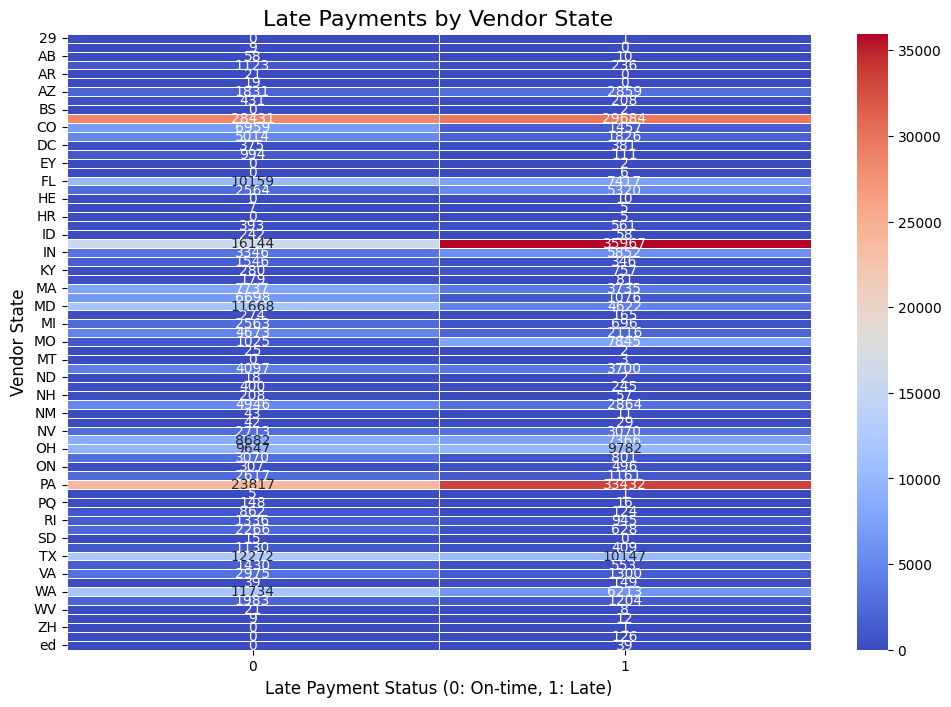

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for state-wise late payment counts
late_payment_state = df2.pivot_table(index='Vendor State', columns='late_payment', aggfunc='size', fill_value=0)

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(late_payment_state, annot=True, cmap='coolwarm', fmt='d', linewidths=.5)
plt.title('Late Payments by Vendor State', fontsize=16)
plt.ylabel('Vendor State', fontsize=12)
plt.xlabel('Late Payment Status (0: On-time, 1: Late)', fontsize=12)
plt.show()


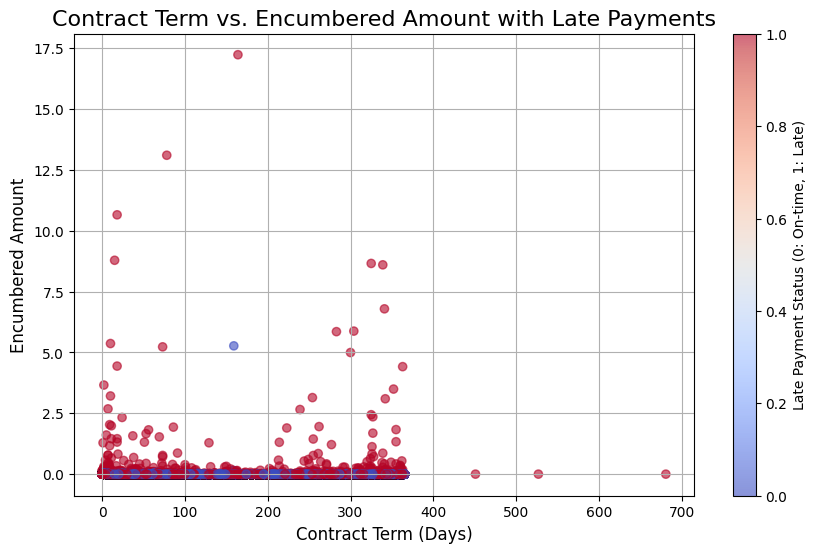

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['contract_term'], df2['Encumbered Amount'], c=df2['late_payment'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Late Payment Status (0: On-time, 1: Late)')
plt.title('Contract Term vs. Encumbered Amount with Late Payments', fontsize=16)
plt.xlabel('Contract Term (Days)', fontsize=12)
plt.ylabel('Encumbered Amount', fontsize=12)
plt.grid(True)
plt.show()


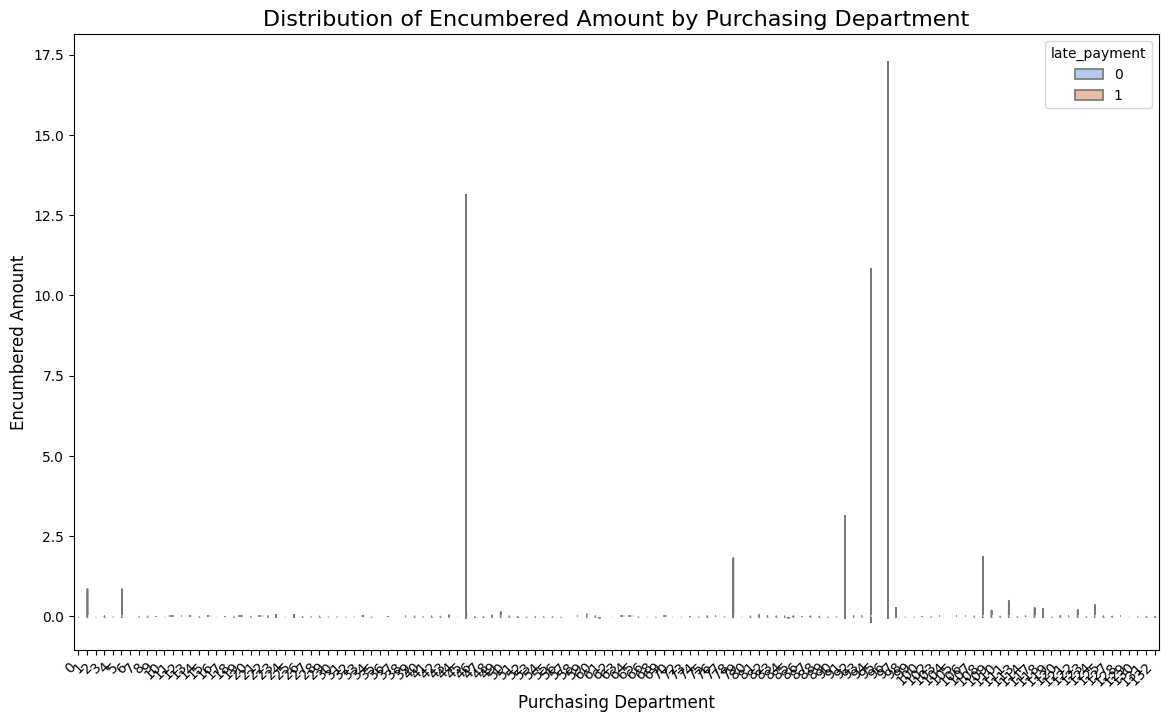

In [ ]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Purchasing Department', y='Encumbered Amount', hue='late_payment', data=df2, split=True, palette='coolwarm')
plt.title('Distribution of Encumbered Amount by Purchasing Department', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Purchasing Department', fontsize=12)
plt.ylabel('Encumbered Amount', fontsize=12)
plt.show()


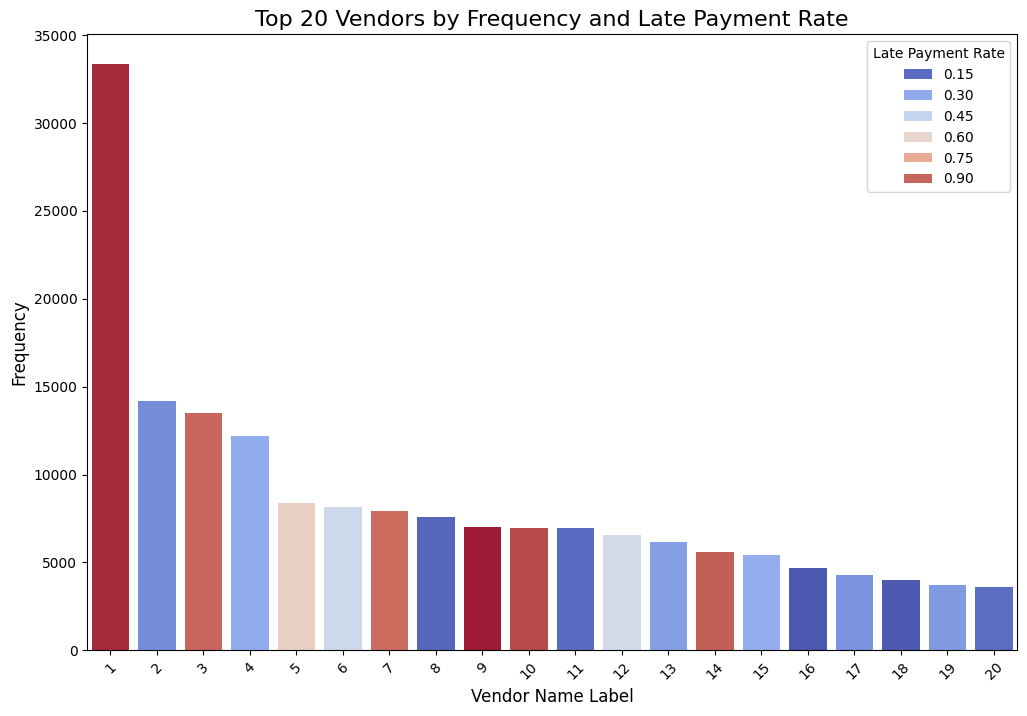

In [ ]:
# Group by vendor and calculate late payment rate
vendor_late_payments = df2.groupby('Vendor_Name_Label').agg({'late_payment': 'mean', 'Vendor_Name_Label': 'size'}).rename(columns={'Vendor_Name_Label': 'frequency'})

# Sort by frequency and plot top 20 vendors
top_vendors = vendor_late_payments.nlargest(20, 'frequency')

# Plot (with hue to reflect late payment rate)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_vendors.index, y=top_vendors['frequency'], palette='coolwarm', hue=top_vendors['late_payment'])
plt.title('Top 20 Vendors by Frequency and Late Payment Rate', fontsize=16)
plt.xlabel('Vendor Name Label', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Late Payment Rate', loc='upper right')
plt.show()


In [ ]:
# Filter the rows where contract_term is greater than 300
df_contract_gt_300 = df2[df2['contract_term'] > 300]



In [ ]:
df_contract_gt_300

,Fiscal Year,Purchase Order,Purchase Order Line,Purchasing Department,Post Date - Original,Post Date - Current,Commodity Code,Commodity Title,Vendor Name,Vendor State,Encumbered Quantity,Encumbered Amount,Fiscal Year Adjusted,Fiscal Year Start,contract_term,Vendor_Name_Label,late_payment
18,2019,0000313263,2.0,49,2019-05-21,2019-06-15,28500,ELECTRICAL EQUIPMENT AND SUPPLIES (EXCEPT CABL...,GRAINGER,IL,-0.003634,-0.001216,2018,2018-07-01,324,3,1
26,2019,0000306891,6.0,111,2019-05-07,2019-06-15,65933,Couplings,GRAINGER,IL,-0.003734,-0.001216,2018,2018-07-01,310,3,1
33,2019,0000306057,1.0,45,2019-05-02,2019-10-15,94848,Health Care Services (Not Otherwise Classified),CSI HEALTHCARE IT,FL,-0.003734,0.044739,2018,2018-07-01,305,2847,1
35,2018,0000190664,1.0,111,2018-06-07,2018-07-18,34000,FIRE PROTECTION EQUIPMENT AND SUPPLIES,CASCADE FIRE EQUIPMENT CO,OR,-0.003709,-0.001194,2017,2017-07-01,341,97,1
37,2018,0000191703,4.0,45,2018-06-13,2019-03-01,20400,COMPUTER HARDWARE AND PERIPHERALS FOR MICROCOM...,CONNECTION,PA,-0.003485,-0.001189,2017,2017-07-01,347,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410411,2018,0000196017,20.0,45,2018-06-24,2019-10-17,47509,Bandages (All Types) Adhesive Tapes Dressings ...,CARDINALHEALTH MEDICAL PRODUCTS & SVCS,CA,-0.003138,-0.001217,2017,2017-07-01,358,9,1
410414,2010,DPRP10002318,4.0,117,2010-05-14,2010-05-14,90203805,HORTICULTURE; SOIL CONDITIONERS & AMMENDMENTS ...,SIERRA PACIFIC TURF SUPPLY,CA,-0.003684,-0.001216,2009,2009-07-01,317,905,0
410422,2019,0000309228,3.0,78,2019-05-13,2019-06-15,6047,Fuel System: Carburetors and Kits Fuel Pumps T...,EDWARD R BACON CO INC,CA,-0.003709,-0.001216,2018,2018-07-01,316,1543,1
410423,2011,DPWP11002655,1.0,39,2011-05-24,2011-05-24,967060,"SEWAGE TREATMENT SYS, EQPT, PARTS, MATLS & SUPPL",FLUID GAUGE COMPANY,CA,-0.002740,-0.001217,2010,2010-07-01,327,150,0
